# Hypothesis Testing

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import math
import random
from scipy import stats

## Wald Test

<div>
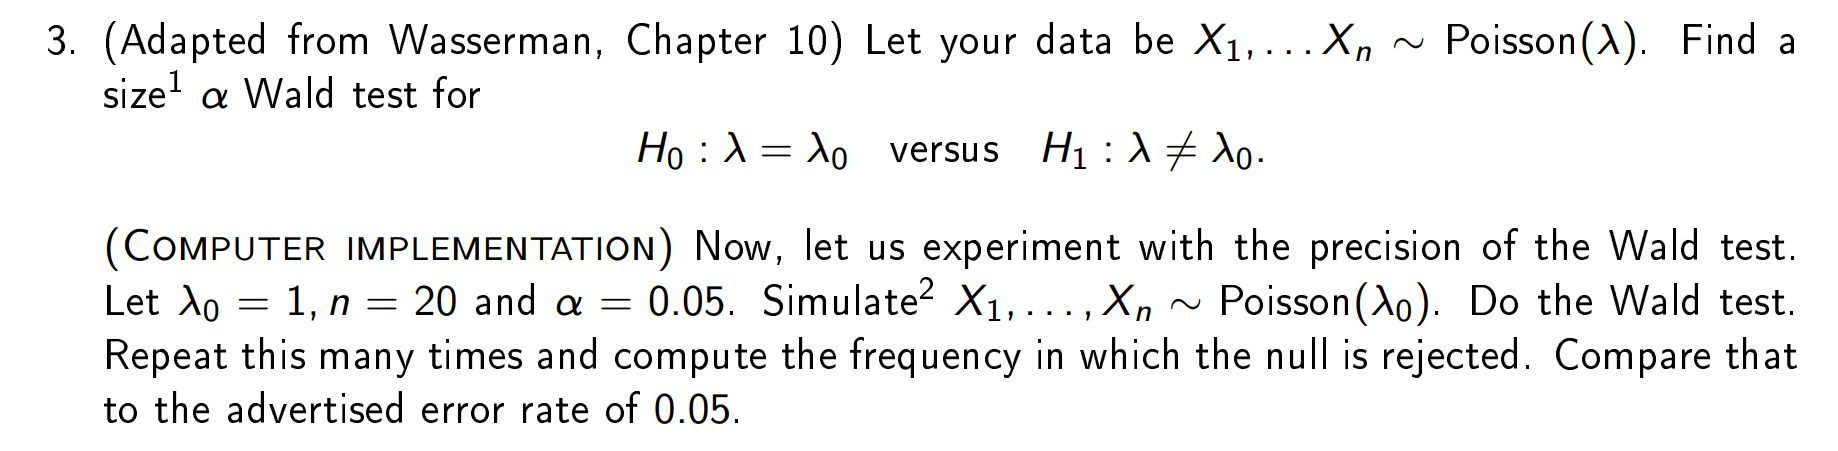
</div>

In [2]:
mu_0, n, alpha, n_test = 1, 20, 0.05, 10000

z_score = stats.norm.ppf(1-alpha/2, loc=0, scale=1)        #calculate the two-tailed z-score for alpha  

results = []
for _ in range(n_test):
    samples = np.random.poisson(mu_0, n)                              #sample from the possion distribution under H0
    w = (np.mean(samples) - mu_0) / (np.std(samples)/np.sqrt(n))      #calculate the test statistic
    if abs(w) > z_score:
        results.append(0)
    else:
        results.append(1)
        
1 - np.mean(results)

0.07879999999999998

## Permutation Test

In [9]:
sample_A = np.array(45*[1] + 35*[0])       #placebo: 80 patients and 45 incidences
sample_B = np.array(26*[1] + 49*[0])       #treatment: 75 patients and 26 incidences
samples = np.append(sample_A, sample_B)

t_obs = abs(45/80-26/75)                   #compute the observed value of test statistics

test_size, p_value = 1000, 0
for _ in range(test_size):
    perm_samples = np.random.permutation(samples)
    T = abs(np.mean(perm_samples[:80])-np.mean(perm_samples[80:]))
    p_value += 1 if T > t_obs else 0

p_value = p_value / test_size
p_value

0.003

## Power of Test

In [20]:
mu_h0, mu_0, sigma_0, n, alpha, test_size = 0, 1, 10, 100, 0.05, 1000

z_score = stats.norm.ppf(1-alpha/2, loc=0, scale=1)          #calculate the two-tailed z-score for alpha  

results = []
for _ in range(test_size):
    X = np.random.normal(loc=mu_0, scale=sigma_0, size=n)     #sample from the true population with mu_0
    Z = (np.mean(X) - mu_h0) / (sigma_0/np.sqrt(n))
    if abs(Z) > z_score:
        results.append(1)
    else:
        results.append(0)
        
np.mean(results)

0.177

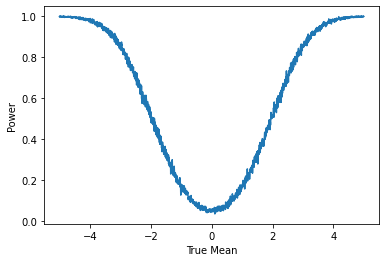

In [32]:
mu_h0, sigma_0, n, alpha, test_size = 0, 10, 100, 0.05, 1000

z_score = stats.norm.ppf(1-alpha/2, loc=0, scale=1)               #calculate the two-tailed z-score for alpha  

powers = []
for mu_0 in np.arange(-5,5,0.005):
    results = []
    for _ in range(test_size):
        X = np.random.normal(loc=mu_0, scale=sigma_0, size=n)     #sample from the true population with mu_0
        Z = (np.mean(X) - mu_h0) / (sigma_0/np.sqrt(n))           #compute the test statistic
        if abs(Z) > z_score:
            results.append(1)
        else:
            results.append(0)
    powers.append(np.mean(results))                               #power: probability of rejecting H0 
    
plt.plot(np.arange(-5,5,0.005), powers)
plt.xlabel('True Mean')
plt.ylabel('Power')
plt.show()

## t-Test for Difference in Means

In [67]:
data = np.genfromtxt('data/lead.dat', names=True, delimiter='', encoding='utf-8')
data

array([(38., 16.), (23., 18.), (41., 18.), (18., 24.), (37., 19.),
       (36., 11.), (23., 10.), (62., 15.), (31., 16.), (34., 18.),
       (24., 18.), (14., 13.), (21., 19.), (17., 10.), (16., 16.),
       (20., 16.), (15., 24.), (10., 13.), (45.,  9.), (39., 14.),
       (22., 21.), (35., 19.), (49.,  7.), (48., 18.), (44., 19.),
       (35., 12.), (43., 11.), (39., 22.), (34., 25.), (13., 16.),
       (73., 13.), (25., 11.), (27., 13.)],
      dtype=[('Treatment', '<f8'), ('Control', '<f8')])

In [73]:
treatment, control = [], []
for X in data:
    treatment.append(X[0])
    control.append(X[1])
print(f'The mean lead concentration for the control group is: {round(np.mean(control),4)}')
print(f'The mean lead concentration for the treatment group is: {round(np.mean(treatment),4)}')

The mean lead concentration for the control group is: 15.8788
The mean lead concentration for the treatment group is: 31.8485


In [75]:
t_stat, p_value = stats.ttest_ind(treatment, control, equal_var=False)
print(f'The p-value for a single sided test is {p_value/2}.')

The p-value for a single sided test is 2.194781679479139e-07.
